# <span style="color:green"><center>Diplomado en Inteligencia Artificial y Aprendizaje Profundo</center></span>

# <span style="color:red"><center>Ejemplos de Modelamiento</center></span>

##   <span style="color:blue">Profesores</span>

1. Alvaro Mauricio Montenegro Díaz, ammontenegrod@unal.edu.co
2. Daniel Mauricio Montenegro Reyes, dextronomo@gmail.com 
3. Campo Elías Pardo Turriago, cepardot@unal.edu.co 

##   <span style="color:blue">Asesora Medios y Marketing digital</span>
 

4. Maria del Pilar Montenegro, pmontenegro88@gmail.com 

## <span style="color:blue">Asistentes</span>

5. Oleg Jarma, ojarmam@unal.edu.co 
6. Laura Lizarazo, ljlizarazore@unal.edu.co 

## Contenido

* [Introducción a Modelamiento](#Introducción-a-Modelamiento)
* [Hipótesis del proceso de Modelado](#Hipótesis-del-proceso-de-Modelado)
* [Ejemplo Práctico del proceso de Modelado](#Ejemplo-Práctico-del-proceso-de-Modelado)
* [Construyendo un Modelo Matemático](#Construyendo-un-Modelo-Matemático)
* [Modelo desde Datos Puros](#Modelo-desde-Datos-Puros)
* [Ejemplos Más Avanzados](#Ejemplos-Más-Avanzados)
* [Usando curve_fit para obtener parámetros (pesos, weights)](#Usando-curve_fit-para-obtener-parámetros-(pesos,-weights))
* [Catálogo de funciones](#Catálogo-de-funciones)
* [Modelos de Predicción](#Modelos-de-Predicción)
* [Redes Neuronales](#Redes-Neuronales)

# Introducción a Modelamiento

¿Qué es modelar?

Para aprender este concepto con profundidad, debemos salirnos de la idea de las matemáticas y pensar más en la vida cotidiana.

Pensemos en nuestras **emociones**.

Si fuéramos un poco juciosos tomando datos cada vez que nos acordemos, digamos 4 veces al día, podríamos obtener información acerca de nuestro día a día.

Supongamos que hacemos alguna vez dicho experimento y escribimos la siguiente información:

---

|Fecha|Hora|Emoción|
|---|---|---|
|07/02/2020|6:00|Cansado|
|07/02/2020|18:00|Optimista| 
|08/02/2020|7:00|Medio Triste|
|08/02/2020|20:00|Cansado|
|09/02/2020|9:00|Hambriento|
|09/02/2020|22:00|Hambriento|
|10/02/2020|11:00|Concentrado|
|10/02/2020|24:00|Muy feliz|

[[Volver]](#Contenido)

## Hipótesis del proceso de Modelado

Nuestro objetivo principal dentro del modelado es la **descripción** y la **predicción**. Si podemos predecir lo que va a suceder con suficiente anterioridad, ganamos:

- Prevención.
- Planificación.
- Cambio.
- Entendimiento.

Con estas cosas en la mente, tratemos de entender la tabla anterior.

Los humanos estamos llenos de diversas emociones, y tal vez tenerlas todas al mismo tiempo en cuenta puede complicar nuestro entendimiento.

**Supongamos** entonces, que podemos resumir la siguiente información de emociones y  traducirlas en un concepto bipolar (Contento/Triste):

|Emoción|Simplificación|
|---|---|
|Cansado|Muy Feliz|
|Optimista|Medio Feliz| 
|Medio Triste|Medio Triste|
|Cansado|Muy Triste|
|Hambriento|Poco Triste|
|Hambriento|Bastante Feliz|
|Concentrado|Bastante Feliz|
|Muy feliz|Poco Triste|

Este proceso anterior se conoce como el proceso de **hipotetizar** el fenómeno a analizar. La idea de generar hipótesis es que podemos de alguna manera ver el problema de manera más sencilla para obtener **conclusiones** válidas del tema estudiado.

**Advertencia:** Este proceso es uno de los más difíciles en el modelado, ya que una hipótesis errónea puede llegar a falsas conclusiones.

[[Volver]](#Contenido)

## Ejemplo Práctico del proceso de Modelado

El arte de poder colocar nuestro conocimiento abstracto en ecuaciones matemáticas fue un gran avance que logró desplazar a la sociedad de su ignorancia de atribuirle eventos que no podían explicar, a eventos que seguían un **comportamiento bien definido** y **predecible**.

Tratemos de modelar la tabla anterior:

Para esto, utilicemos una **escala** que signifique algo cuantitativamente. 

Por ejemplo:

**Emoción $\rightarrow [-1,1]$**, donde Muy Triste es $-1$ y Muy Feliz es $1$.

Al hacer esto, hemos entonces creado un estándar que nos servirá para dar un primer indicio de nuestra información:

|Hora|Emoción|Simplificación|Datos|
|---|---|---|---|
|6:00|Cansado|Muy Feliz|1|
|18:00|Optimista|Medio Feliz|0.4| 
|7:00|Medio Triste|Medio Triste|-0.6|
|20:00|Cansado|Muy Triste|-0.9|
|9:00|Hambriento|Poco Triste|-0.1|
|22:00|Hambriento|Bastante Feliz|0.8|
|11:00|Concentrado|Bastante Feliz|0.8|
|24:00|Muy feliz|Poco Triste|-0.18|


Con esto hecho, ya podemos comenzar a visualizar nuestra información en un gráfico que dice mucho más que mil palabras (o números) en una tabla:

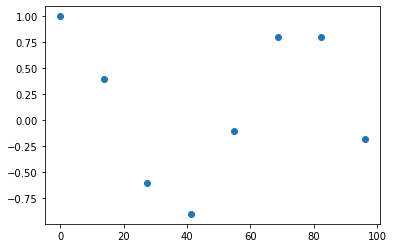

In [4]:
import matplotlib.pyplot as plt
import numpy as np

t = np.array(np.linspace(0,96,8))
E = [1,0.4,-0.6,-0.9,-0.1,0.8,0.8,-0.18]

plt.plot(t,E, marker="o",linestyle="")
#plt.grid()
plt.show()

[[Volver]](#Contenido)

## Construyendo un Modelo Matemático

Ahora que tenemos los datos, podemos comenzar a intentar adivinar qué forma tendrán dichos datos para hacer el proceso de **predicción**.

Dada la forma de los datos, parece que sigue un **patrón cíclico**.

De nuestra experiencia en matemáticas, podemos inferir que podríamos **acodomar** una función trigonométrica a dichos datos y esperar que dicho comportamiento se repita para el futuro.

Modelizamos entonces

$$E(t) = \cos(t)$$

y miramos los resultados:

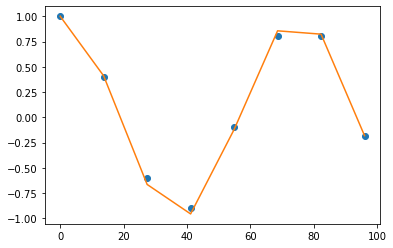

In [5]:
# Model
E_m1 = np.cos(t)

# Verifying Model
plt.plot(t,E,marker="o",linestyle="")
plt.plot(t,E_m1)
plt.show()

Sin embargo, démonos cuenta de lo siguiente:

La función $\cos(t)$ se ve más suave que lo que observamos en la gráfica.

¿Será que hay alguna forma de recuperar dicha resolución?

**Respuesta:** Sí!

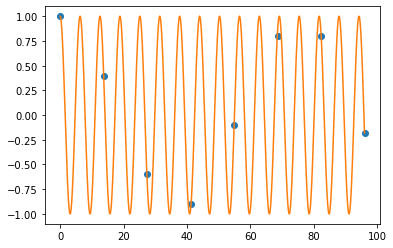

In [6]:
# Better Resolution Model
t_m = np.linspace(0,96,10000)
E_m2 = np.cos(t_m)

# Verifying Model
plt.plot(t,E,marker="o",linestyle="")
plt.plot(t_m,E_m2)
plt.show()

**¡Ajá!** Entonces, observemos toda la cantidad de información que habíamos estado ignorando todo este tiempo!

La idea del modelamiento, es poder observar esta información pérdida, predecir y verificar(validar) que dicho modelo se ajusta bien a nuevos datos no tomados.

[[Volver]](#Contenido)

## Modelo desde Datos Puros

A continuación, trataremos de hacer un modelo que viene desed un valores separado por comas (CSV).

In [8]:
daticos=np.genfromtxt('../datos.csv', delimiter=',')

Veamos algunos valores y su forma:

In [9]:
print("\nPrimeros cinco datos:\n\n","          x               y\n",daticos[0:5,:])
print("\nLos datos tienen forma:",daticos.shape)


Primeros cinco datos:

           x               y
 [[ 0.00000000e+00  1.05203676e+02]
 [ 1.00334448e-01  8.82304968e+01]
 [ 2.00668896e-01  7.87328416e+01]
 [ 3.01003344e-01 -3.60431903e+01]
 [ 4.01337793e-01  1.20883757e+02]]

Los datos tienen forma: (300, 2)


usando las facilidades de Python, podemos desempaquetar los datos en variables separadas:

In [10]:
x,y=daticos[:,0],daticos[:,1]

Veamos los datos

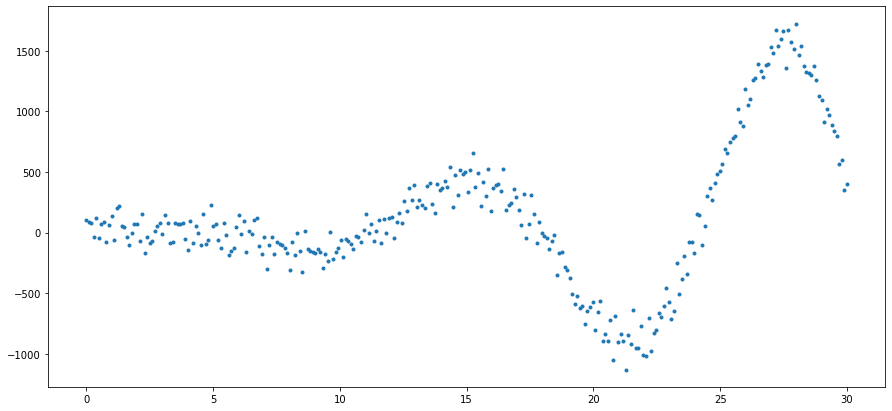

In [11]:
plt.figure(figsize=(15,7))
plt.plot(x,y,'.')
plt.show()

**¿Qué opinan?**

$$ax\cos(bx)$$

## Usando curve_fit para obtener parámetros (pesos, weights)

In [104]:
from scipy.optimize import curve_fit

# GENERAR EL MODELO
def modelito(x,a,b):
    return a*np.sin(b*x)

# usando la función curve_fit para hacer el ajuste
pars,_ = curve_fit(modelito, x, y)

# observar pesos
print(pars)

[90.36630031  0.97325798]


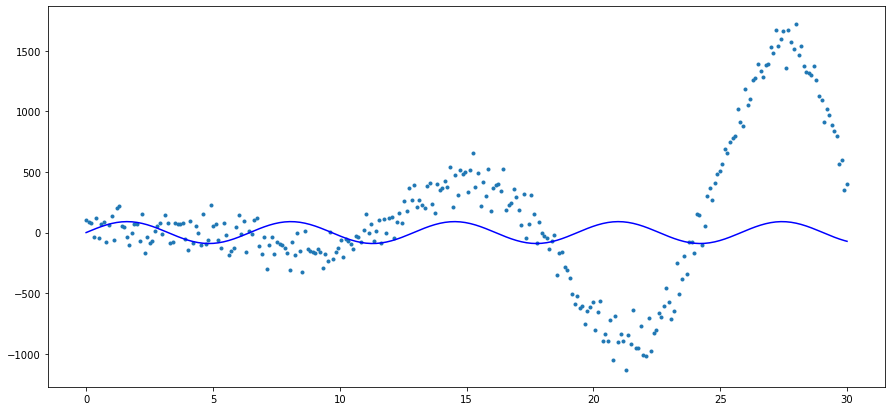

In [105]:
plt.figure(figsize=(15,7))
plt.plot(x,y,'.')
plt.plot(x,modelito(x,*pars),'b-')
plt.show()

[[Volver]](#Contenido)

## Ejemplos Más Avanzados

Por supuesto, los ejemplos no se dan únicamente en una dimensión.

Veamos a continuación un ejemplo en 2D:

![Super](https://www.mathworks.com/help/examples/stats/win64/EstimateMultipleLinearRegressionCoefficientsExample_01.png)

Fuente de la imagen: [MathWorks](https://www.mathworks.com/help/stats/regress.html)

[[Volver]](#Contenido)

## Catálogo de funciones 

![Modelitos](http://3.bp.blogspot.com/-TJ-Ipbn929A/TpWBCnlNNxI/AAAAAAAABu4/HMqt2Avz80U/s1600/Parent_Functions_%2528Falzone%2529.png)

Fuente de la imagen: [Scholars on Mayhew](http://scholarsonmayhew.blogspot.com/)

![Superficies](https://www.math.tamu.edu/~ssinjini/Math251/QuadricChart.gif)

Fuente de la imagen: [TAMU](https://www.math.tamu.edu/~ssinjini/Math251/Calc3.html)

[[Volver]](#Contenido)

## Modelos de Clasificación

La problemática general es poder generar un modelo que pueda identificar o clasificar diferentes etiquetas dentro de los datos.

![class1](https://miro.medium.com/max/1200/1*z_B0o4JbD0C6gpmcenUc4w.jpeg)

Fuente de la imagen: [Medium](https://towardsdatascience.com/support-vector-machines-svm-clearly-explained-a-python-tutorial-for-classification-problems-29c539f3ad8)

<img src="https://media.geeksforgeeks.org/wp-content/uploads/3d1.png" width= 1000 height=400></img>

Fuente de la imagen: [Geeks for Geeks](https://www.geeksforgeeks.org/ml-using-svm-to-perform-classification-on-a-non-linear-dataset/)

[[Volver]](#Contenido)

## Redes Neuronales 

![Michifoo](https://content.codecademy.com/programs/machine-learning/perceptron/perceptron.png)

Fuente de la imagen: [Codecademy](https://www.codecademy.com/articles/what-are-neural-nets)

<img src="https://miro.medium.com/max/572/1*kOVIEQihU2bKPu2-13b5Jw.gif" width=1000 height=400></img>

![Class](https://i.imgur.com/EmaJ5JU.gif)

Fuente de los gif: [Medium](https://www.codecademy.com/articles/what-are-neural-nets)